# Predictive Modeling Example

**Week05, Logistic Example Model Fitting**

ISM6136

&copy; 2023 Dr. Tim Smith

---


## Step 1: Import the libraries we will use in this notebook

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

# import ConfusionMatrixDisplay from sklearn
from sklearn.metrics import ConfusionMatrixDisplay

# import accuracy_score, precision_score, recall_score, f1_score from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(1) # set this to ensure the results are repeatable. 

In [83]:
%matplotlib widget 

## Step 2: Load the given data that we will model

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/prof-tcsmith/data/master/RidingMowers.csv')

df.head(3)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner


Seperate out the input m(X) and the target (y)

In [85]:
X=df[['Income', 'Lot_Size']]
y=df[['Ownership']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

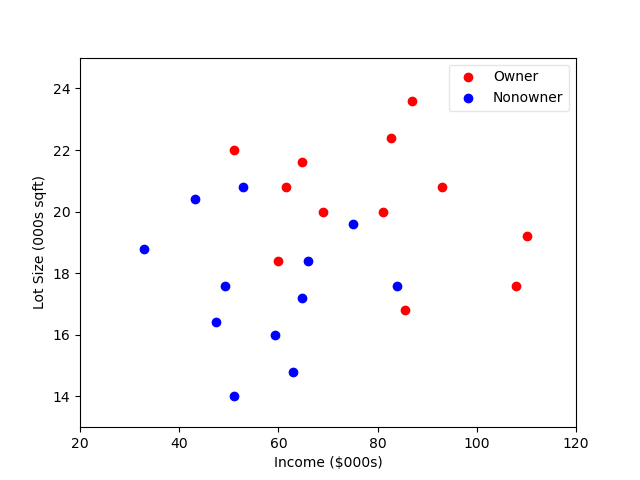

In [86]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df.loc[df.Ownership=='Owner']['Income'], 
           df.loc[df.Ownership=='Owner']['Lot_Size'], 
           marker='o', 
           color='red')
ax.scatter(df.loc[df.Ownership=='Nonowner']['Income'], 
           df.loc[df.Ownership=='Nonowner']['Lot_Size'], 
           marker='o', 
           color='blue')

ax.legend(["Owner", "Nonowner"], framealpha=0.5)
                                         
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')

plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [87]:
model = LogisticRegression()
model = model.fit(X,np.ravel(y))

df['Prediction'] = model.predict(X)

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

/var/folders/fc/_rjkdv156tv7hwc972mv_lsm0000gq/T/ipykernel_2976/3055456853.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey=True)


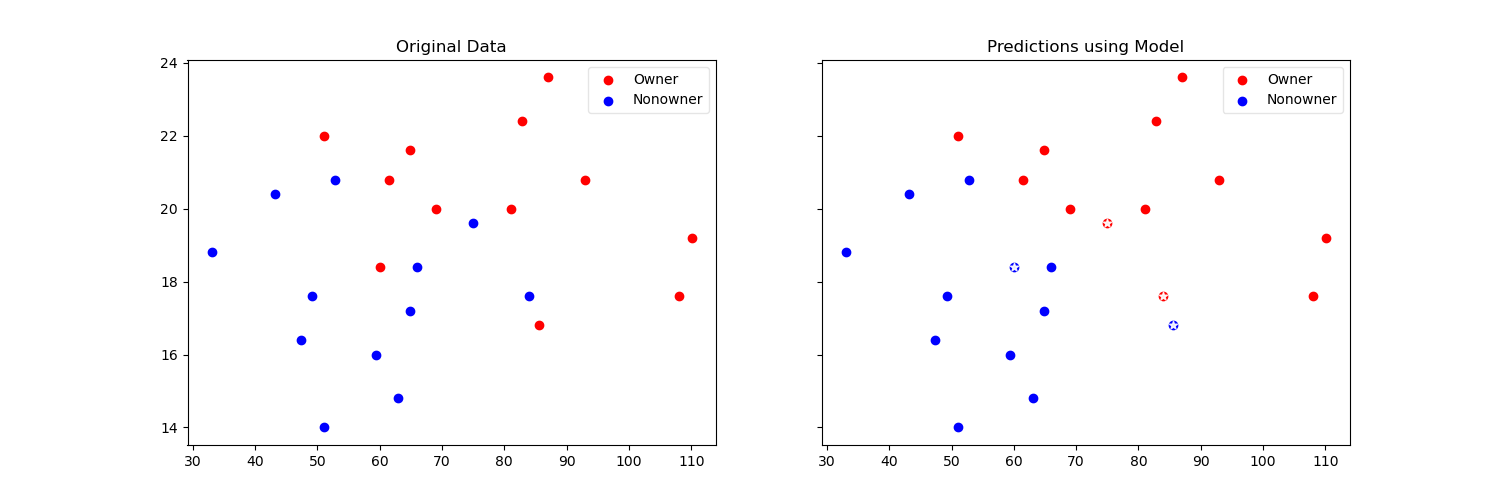

In [88]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey=True)

ax1.title.set_text('Original Data')
ax1.scatter(df.loc[df.Ownership=='Owner']['Income'], 
           df.loc[df.Ownership=='Owner']['Lot_Size'], 
           marker='o', 
           color='red')
ax1.scatter(df.loc[df.Ownership=='Nonowner']['Income'], 
           df.loc[df.Ownership=='Nonowner']['Lot_Size'], 
           marker='o', 
           color='blue')

ax1.legend(["Owner", "Nonowner"], framealpha=0.5)

ax2.title.set_text('Predictions using Model')
ax2.scatter(df.loc[df.Prediction=='Owner']['Income'], 
           df.loc[df.Prediction=='Owner']['Lot_Size'], 
           marker='o', 
           color='red')
ax2.scatter(df.loc[df.Prediction=='Nonowner']['Income'], 
           df.loc[df.Prediction=='Nonowner']['Lot_Size'], 
           marker='o', 
           color='blue')

ax2.scatter(df.loc[df.Prediction!=df.Ownership]['Income'], 
           df.loc[df.Prediction!=df.Ownership]['Lot_Size'], 
           marker='*', 
           color='white',
           alpha=0.9)
ax2.legend(["Owner", "Nonowner"], framealpha=0.5)


... using fstring formatting, we can display these values as follows...

In [89]:
## Evaluate the model

In [90]:
results = pd.DataFrame()
results['actual'] = y
results['predicted'] = model.predict(X)
results['correct'] = results['actual']==results['predicted']
results

,actual,predicted,correct
0,Owner,Nonowner,False
1,Owner,Nonowner,False
2,Owner,Owner,True
3,Owner,Owner,True
4,Owner,Owner,True
5,Owner,Owner,True
6,Owner,Owner,True
7,Owner,Owner,True
8,Owner,Owner,True
9,Owner,Owner,True


In [91]:
# display accuracy, precision, recall, and F1 score
# use sklearns metrics functions

print('Accuracy: ', accuracy_score(results['actual'], results['predicted']))
print('Precision:', precision_score(results['actual'], results['predicted'], pos_label='Owner'))
print('Recall:   ', recall_score(results['actual'], results['predicted'], pos_label='Owner'))
print('F1 score: ', f1_score(results['actual'], results['predicted'], pos_label='Owner'))

Accuracy:  0.8333333333333334
Precision: 0.8333333333333334
Recall:    0.8333333333333334
F1 score:  0.8333333333333334


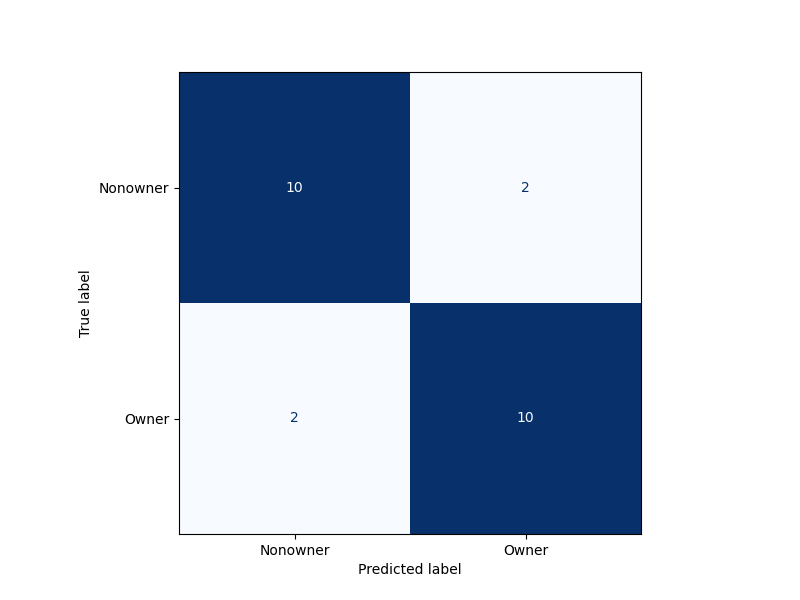

In [92]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()